In [1]:
import gensim
import numpy as np
import seaborn as sns

In [2]:
f = open('/Users/adityakumar/Desktop/Machine Learning/input.txt')
ds = f.read()
f.close()

In [3]:
syms = ['"', ';', ':', ',', '?', '!', '&', '(', ')', '[', ']', "'", '$', '@', '~', '-', '#']
syms_2 = ['\n', '\t', '_', '>', '<', '      ']

In [4]:
data=[]
for ix in ds.split('.')[:]:
    val =ix 
    for s in syms:
        val=val.strip().replace(s, '')
    for s in syms_2:
        val=val.strip().replace(s, ' ')
        
    if len(val)<500 and len(val)>40:
        data.append(val.lower())

In [5]:
len(data)
#data[:10]

26115

In [6]:
train=[]
for ix in data[:]:
    train.append(ix.lower().split())

In [7]:
train[-2:]

[['es',
  'for',
  'an',
  'electronic',
  'form',
  'of',
  'this',
  'text',
  'and',
  'additional',
  'information',
  'about',
  'it'],
 ['this', 'text', 'comes', 'from', 'the', 'collections', 'version', '3']]

In [8]:
model = gensim.models.Word2Vec(train, workers=6, iter=20, sg=0)

In [9]:
model.wv.similar_by_word('murder')

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('crime', 0.7883197069168091),
 ('society', 0.6478241086006165),
 ('motive', 0.641400933265686),
 ('criminal', 0.6302962303161621),
 ('deed', 0.6127544641494751),
 ('name', 0.6102032661437988),
 ('real', 0.5911777019500732),
 ('mere', 0.5794969797134399),
 ('murderer', 0.5792297720909119),
 ('meaning', 0.579204261302948)]

In [10]:
w = 'horse car engine travel'.split()
print(w)

['horse', 'car', 'engine', 'travel']


In [11]:
m = np.zeros((len(w), len(w)))
for ix in range(len(w)):
    for wx in range(len(w)):
        m[ix, wx] = model.wv.similarity(w[ix], w[wx])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


['horse', 'car', 'engine', 'travel']
[[1.         0.37078178 0.04722046 0.27962646]
 [0.37078178 1.         0.32648203 0.3805863 ]
 [0.04722046 0.32648203 0.99999994 0.1204745 ]
 [0.27962646 0.3805863  0.1204745  0.99999994]]


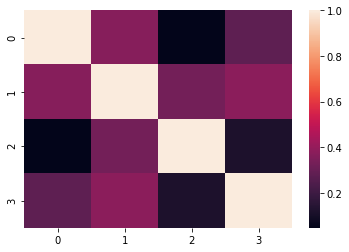

In [12]:
print(w)
print(m)
sns.heatmap(m)

In [1]:
import spacy

ValueError: unknown locale: UTF-8

In [14]:
word_embeddings = spacy.load('en', vectors='glove.6B.300d.txt')

NameError: name 'spacy' is not defined

In [16]:
type('a'), type(u'a')

(str, str)

In [18]:
q = word_embeddings(u'what')
print (q.vector.shape)

(384,)


In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
def sim(w1, w2):
    v1 = word_embeddings(w1)
    v2 = word_embeddings(w2)
    
    return cosine_similarity(v1.vector.reshape(1, -1), v2.vector.reshape(1, -1))

In [21]:
word1 = u'money'
word2 = u'cash'
print( sim(word1, word2))

[[0.67306334]]


In [52]:
#similar?

In [44]:
#gensim.models.Word2Vec?

In [38]:
#model.wv?